In [1]:
#可用裝置清單
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_gpus())

#設定Jupyter對獨佔一行的所有變數或者語句都自動顯示
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from time import time
os.environ['CUDA_VISIBLE_DEVICES'] = "0" #指定使用第0個GPU
gpu_options = tf.GPUOptions(allow_growth=True) #指定記憶體增長
config = tf.ConfigProto(gpu_options=gpu_options)

['/cpu:0', '/gpu:0']


In [2]:
import urllib.request
url = 'http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
filepath = "E:/WorkSpace/TensorFlowWorkSpace/running_data/download_data/titanic3.xls"
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath)
    print(url)
    print('download:',result)

In [3]:
titani_df = pd.read_excel(filepath)
cols = ['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'] #選取指定column
titani_df = titani_df[cols]
titani_df[:2]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S


In [4]:
from  sklearn import preprocessing #sklearn預處理模組
msk = np.random.rand(len(titani_df)) < 0.5
train_df = titani_df[msk]
test_df = titani_df[~msk]

msk2 = np.random.rand(len(train_df)) < 0.1
valid_df = train_df[msk2]
train_df = train_df[~msk2]

print('train_df比例:{}%\nvalid_df比例:{}%\ntest_df比例:{}%\n'.format(
    int(len(train_df)/len(titani_df)*100),
    int(len(valid_df)/len(titani_df)*100),
    int(len(test_df)/len(titani_df)*100)))
      
print('total筆數:{}\ntrain筆數:{}\nvalid筆數:{}\ntest筆數:{}'.format(\
    len(titani_df),len(train_df),len(valid_df),len(test_df)))      

train_df比例:45%
valid_df比例:4%
test_df比例:49%

total筆數:1309
train筆數:600
valid筆數:60
test筆數:649


In [5]:
def PreprocessData(raw_df):
    df = raw_df.drop(['name'],axis=1) #訓練df不需要name欄位
    age_mean = df['age'].mean() #age_mean :年齡平均值
    df['age'] = df['age'].fillna(age_mean) #將age欄中的空值填入平均值
    fare_mean = df['fare'].mean() #fare_mean :fare平均值
    df['fare'] = df['fare'].fillna(fare_mean)    
    df['sex'] = df['sex'].map({'female':0,'male':1}).astype(int) #將男女性別轉換為0和1
    
    x_OneHot_df = pd.get_dummies(data=df , columns=['embarked']) #將embarked欄位以pandas進行OneHot encode
    ndarray = x_OneHot_df.values
    Label = ndarray[:,0] #取出每筆資料的資料欄位0，作為Label
    Feature = ndarray[ : , 1:] #取出每筆資料的從欄位1之後的欄位，作為Feature
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1)) #建立標準化刻度    
    if np.isnan(Feature).any(): # 檢查數據中是否有缺失值
        print('缺失值 : ',np.isnan(Feature).any()) 
        for dim1,i in enumerate(Feature):
            for dim2,j in enumerate(i):
                if np.isnan(j).any():
                    print(dim1,dim2,j)
                    i[dim2] = 0 #對缺失值進行填充處理
    scaleFeature = minmax_scale.fit_transform(Feature) #以minmax_scale標準化刻度進行標準化
    Label = np.reshape(Label,(-1,1))
    
    return scaleFeature,Label

train_Features,train_labels = PreprocessData(train_df)    
valid_Features,valid_labels = PreprocessData(valid_df)
test_Features,test_labels = PreprocessData(test_df)

In [6]:
train_Features[:2]
train_labels[:2]

valid_Features[:2]
valid_Features[:2]

test_Features[:2]
test_Features[:2]

array([[0.        , 1.        , 0.00771013, 0.125     , 0.33333333,
        0.2958059 , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.62995611, 0.        , 0.        ,
        0.05182215, 0.        , 0.        , 1.        ]])

array([[1.],
       [1.]])

array([[0.        , 0.        , 0.85454545, 0.        , 0.11111111,
        0.94114373, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.10095057, 0.        , 0.        , 1.        ]])

array([[0.        , 0.        , 0.85454545, 0.        , 0.11111111,
        0.94114373, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.10095057, 0.        , 0.        , 1.        ]])

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

array([[0.        , 0.        , 0.36116884, 0.        , 0.        ,
        0.41250333, 0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.0229641 , 0.125     , 0.22222222,
        0.2958059 , 0.        , 0.        , 1.        ]])

In [17]:
#模型函數定義
def layer(input_dim,output_dim,inputs,activation):
    W = tf.Variable(tf.random_normal([input_dim,output_dim]),name='W') 
    b = tf.Variable(tf.random_normal([1,output_dim]),name='b')
    outputs = tf.matmul(inputs,W,name='matmul') + b 
    if activation ==None:
        return outputs
    else: 
        return activation(outputs)
    
#MLP model架構
with tf.name_scope('Input_Layer'):
    x = tf.placeholder(tf.float32,[None,9])    

with tf.name_scope('Hidden_Layer1'):    
    h1 = layer(input_dim=9,
               output_dim=40,
               inputs=x,
               activation=tf.nn.relu)
with tf.name_scope('Hidden_Layer2'):   
    h2 = layer(input_dim=40,
               output_dim=100,
               inputs=h1,
               activation=tf.nn.relu)
with tf.name_scope('Output_Layer'):       
    y_predict = layer(input_dim=100, # y_predict : 每次epoch的預測值
              output_dim=1,
              inputs=h2,
              activation=tf.nn.sigmoid)
with tf.name_scope('optimizer'):    
    y_label = tf.placeholder(tf.float32,[None,1]) # y_predict : 每次epoch的真實label
    #定義loss function
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict,
                                                                            labels=y_label))
    #定義Optimizer function
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)

with tf.name_scope('evaluate_model'):                                                                              
    #定義模型預測
    prediction = tf.equal(tf.argmax(y_predict,1),tf.argmax(y_label,1))
    #定義模型準確率
    accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))


In [18]:
def get_batch(data_x,data_y,step,batch_size):  
    batch_x=data_x[ step*batch_size : (step+1) * batch_size ]
    batch_y=data_y[ step*batch_size : (step+1) * batch_size ]
    print("{} ~ {}".format(step*batch_size,(step+1) * batch_size))
    return batch_x,batch_y
        
#定義訓練參數
trainEpochs = 30
batchSize = 100
totalBatch =int(len(train_Features) / batchSize)
print(totalBatch)
loss_list = [];  epoch_list = []; accuracy_list= []

startime = time()
with tf.Session(config=config) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for epoch in range(trainEpochs):
        for i in range(totalBatch):
            batch_x,batch_y = get_batch(train_Features,train_labels,i,batchSize)
            sess.run(optimizer,feed_dict={x:batch_x,y_label:batch_y}) 
            loss,acc = sess.run([loss_function,accuracy],feed_dict={x:valid_Features,
                                                                    y_label:valid_labels})
        epoch_list.append(epoch)
        loss_list.append(loss)
        accuracy_list.append(acc)
        print("Train Epoch:" , '%02d'%(epoch+1), ", Loss =",'%.9f'% loss,", Accuracy=",acc)
    duration = time() - startime 
    print("Train Finished cost " , duration)
    print("Accuracy:",sess.run(accuracy,feed_dict={x:test_Features,
                                                   y_label:test_labels}))    
    
    # 建立Jack & Rose的相關資料
    Jack = pd.Series([0,'Jack',3,'male',23,1,0,5.0000,'S'])
    Rose = pd.Series([1,'Rose',1,'female',20,1,0,100.0000,'S'])
    JR_df = pd.DataFrame([list(Jack),list(Rose)],
                          columns=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked'])
    # 合併Jack & Rose的相關資料
    all_df = pd.concat([titani_df,JR_df])
    all_df[-2:]
    all_features,Label = PreprocessData(all_df)     
    prediction_result = sess.run(tf.argmax(y_predict,1),feed_dict={x:all_features}) 
    
train_writer = tf.summary.FileWriter('E:/WorkSpace/TensorFlowWorkSpace/running_data/log/Titanic3_MLP',
                                    tf.get_default_graph())
train_writer.close() 
# TensorBoard視覺化指令
# tensorboard --logdir E:/WorkSpace/TensorFlowWorkSpace/running_data/log/Titanic3_MLP

6
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 01 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 02 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 03 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 04 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 05 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 06 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 07 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 08 , Loss = 0.000000000 , Accuracy= 1.0
0 ~ 100
100 ~ 200
200 ~ 300
300 ~ 400
400 ~ 500
500 ~ 600
Train Epoch: 09 , Loss = 0.000000000 , Accuracy= 1.0

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


<Figure size 432x288 with 0 Axes>

Text(0.5,1,'誤差值趨勢圖')

Text(0.5,0,'epoch')

Text(0,0.5,'loss')

(0, 15)

Text(0.5,1,'準確率趨勢圖')

Text(0.5,0,'epoch')

Text(0,0.5,'accuracy')

(0, 15)

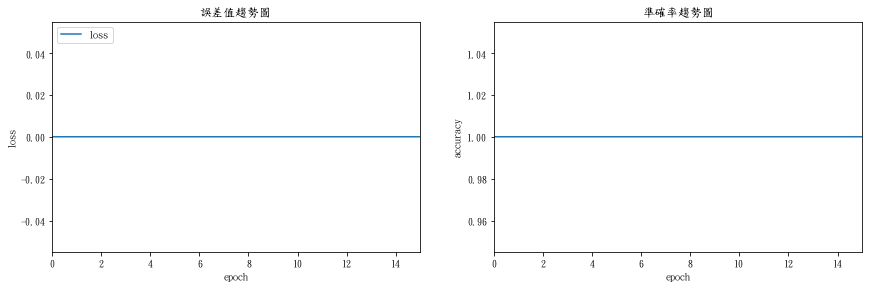

In [9]:
# loss_list
%matplotlib inline

left = 0.125 # the left side of the subplots of the figure
right = 2 # the right side of the subplots of the figure
bottom = 0.1 # the bottom of the subplots of the figure
top = 0.9 # the top of the subplots of the figure
wspace = 0.2 # the amount of width reserved for blank space between subplots
hspace = 0.5 # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)


plt.figure(1)
plt.subplot(121)
# fig.set_size_inches(4,2)
plt.plot(epoch_list,loss_list,label='loss')
plt.title('誤差值趨勢圖')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(0,15)
plt.legend(['loss'],loc='upper left')

plt.subplot(122)
plt.plot(epoch_list,accuracy_list,label='accuracy')
plt.title('準確率趨勢圖')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim(0,15)
# plt.ylim(0.8,1) #設定Y軸顯示的範圍

In [10]:
all_df.insert(len(all_df.columns),'probability',prediction_result) #插入新的columns
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0
1,1,Rose,1,female,20.0,1,0,100.0,S,0


In [11]:
all_df[(all_df.survived==0)&(all_df.probability>0.9)] #生存機率大於1卻死亡的名單

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability


In [12]:
all_df[:5]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0
